### Example

* Suppose we have two samples that represent biki ride durations for two distinct neighborhoods `a` and `b`

1. Instead of working with actual data, sample the data from a gaussian the same mean ($\mu=20$) the same same standard deviation ($\sigma = 4$)
    * We will sample 15 bike rides for each of regions `a` and `b`
    

In [20]:
# Write your code here
#Data Science Libraries Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
#Gaussian Distribution Sampling
#configs- mean=20, std_dev=4, size=15 for both regions {a,b}
region_a = np.random.normal(20, 4, 15)
region_b = np.random.normal(20, 4, 15)

### Example - cont'd

2. Compute and compare the means of datasets `a` `b`
  * Based on the observed difference between the means, do you believe there is a statistically significant difference between samples `a` and `b`

In [22]:
df = pd.DataFrame()

df['a'] = pd.Series(region_a)
df['b'] = pd.Series(region_b)
print(df.head(15))

            a          b
0   22.560468  20.515746
1   19.900390  25.432792
2   24.374523  17.425701
3   27.093606  20.012278
4   12.477890  17.902037
5   20.848597  23.428037
6   26.365739  20.648772
7   18.399449  21.300107
8   18.133748  21.650432
9   21.484281  19.384092
10  13.208488  20.162771
11  15.288235  18.962984
12  17.342177  16.913338
13  19.302364  18.410267
14  25.402112  28.603609


In [23]:
#Computing Means of regions {a,b}
print("region 'a' mean:", df['a'].mean())
print("region 'b' mean:", df['b'].mean())

region 'a' mean: 20.145471128602008
region 'b' mean: 20.71686414424831


Q: Based on the observed difference between the means, do you believe there is a statistically significant difference between samples `a` and `b`

A: Based on the observed difference, we cannot determine if such samples are statistically significant difference. However, the mean value of regions a,b can be apart of the "T-Test" - a method of inferential statistic used to determine if there is a significant difference between the means of two groups. To claim if such samples are statistically significant, then we must compute the difference between the mean values (we computed the following mean values from the above code, but not the difference property), the standard deviation of each group (we did not compute this), and the number of data values of each group (we have this by the above configurations size=15).

### Example - cont'd

3. draw the two KDEs reprenting the datasets `a` and `b`
  * You should have a figure that appears "approximately" as in the figure below
    * The X- and Y-axis values have been intentionally omitted
    
![](https://www.dropbox.com/s/0ab4d92lkcn89jv/a_b_kde_exmaple.png?dl=1)    

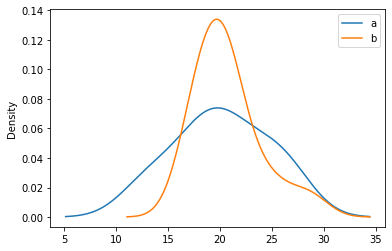

In [24]:
# Write your code here
ax = df.plot.kde()
ax

### Example - cont'd

4. Visually, does dataset *a* differ significantly from dataset `b`

Visually - yes. We can see the difference from dataset a and dataset b based on the following density plot of both sample a and sample b regions. For example, we can deduce the difference by the standard deviation value.

### Example - cont'd

5. Use the resampling method covered in class to test whether or not there is a statistically significant difference between datasets `a` and `b`
 * Provide a p-value to support your claim.


In [25]:
# Write your code here
permutationCount = 1000
pop  = list(df["a"])  + list(df["b"])
print(pop)

bs_diff = []

#Bootsrapping procedure
for i in range(1000):
    np.random.shuffle(pop)
    psuedo_a = pop[:15]
    psuedo_b = pop[15:]
    psuedo_o = np.mean(psuedo_a) - np.mean(psuedo_b)

    bs_diff.append(psuedo_o)

[22.56046796098427, 19.900389794057322, 24.374523435821907, 27.093605569480378, 12.477889855452958, 20.848596904296286, 26.36573876360449, 18.399449436485448, 18.133747587707106, 21.484281105945186, 13.20848837873612, 15.288234585792289, 17.342177404280992, 19.302363742057672, 25.40211240432775, 20.515746248613667, 25.432792001380413, 17.42570116144451, 20.012277970652985, 17.90203653341874, 23.428036579941065, 20.64877211450839, 21.30010662473856, 21.65043166603907, 19.384091718461967, 20.162770894917326, 18.962984499372947, 16.913337966140304, 18.410266881065713, 28.603609303029042]


In [26]:
"""
P-Value
"""
from scipy import stats
print(stats.ttest_ind(df["a"], df["b"]).pvalue)

0.6906731557556688


### Example - cont'd

6. Plot a histogram of the means obtained during resampling and the observed value. 
  * You should have a figure that appears "approximately" as in the figure below
![](https://www.dropbox.com/s/g54bal23o1ktj2j/a_b_hist_example.png?dl=1)  

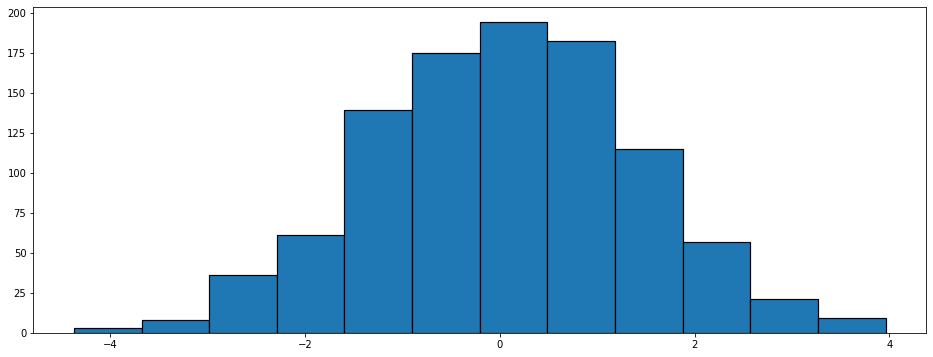

In [27]:
# Write your code here
plt.figure(figsize=(16,6))
plt.hist(bs_diff, edgecolor='k', linewidth=1.2, bins=12)
plt.show()